In [51]:
#Load Libraries
#Ayyub Jose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns

import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


## Business Description

Using information from the Drug dataset, the company wants to use a decision tree matrix to analyze which class of drugs should be used on patients. There are 5 classes of drugs and depending on the other parameters within the matrix the company wants to use decision trees to analyze under which circumstances the specified drug should be used.

In [52]:
#Load Dataset
df = pd.read_csv('./drug200.csv')
alabs = df.Drug.unique()
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## EDA : Exploratory Data Analysis

In [53]:
# import sweetviz library
import sweetviz as sv
# analyzing the drug study dataset
drug_study_report = sv.analyze(df)
#Default arguments will generate to “Drug_Study.html’’’
drug_study_report.show_html('Drug_Study.html')


Report Drug_Study.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<h1>Summary</h1>

The data set contains 200 rows with no missing or duplicated rows
Our target column is the drug column and our predictor columsn are Age , Sex , BP , Cholestorol and Na to Potassium Ration.
Our data is a mix of categorical and numerican data.

In the data set the Age column has ages ranging from 15 to 74. 52% of the pateints are male and 48% Fenale. 

38% patients have high blood pressure, with 32% bieng low and 30% being normal.




<b>Data Pre Processing</b>

Our Predictor Columns are categorical and will need to be changed to numerical variables

In [54]:
Sex_mapping = {"M": 0, "F": 1 }
df['Sex'] = df['Sex'].map(Sex_mapping)

BP_mapping = {"LOW": 0, "NORMAL": 1,"HIGH": 2}
df['BP'] = df['BP'].map(BP_mapping)


BP_mapping = {"NORMAL": 0, "HIGH": 1}
df['Cholesterol'] = df['Cholesterol'].map(BP_mapping)

## Understanding the Correlation between Columns

<AxesSubplot:>

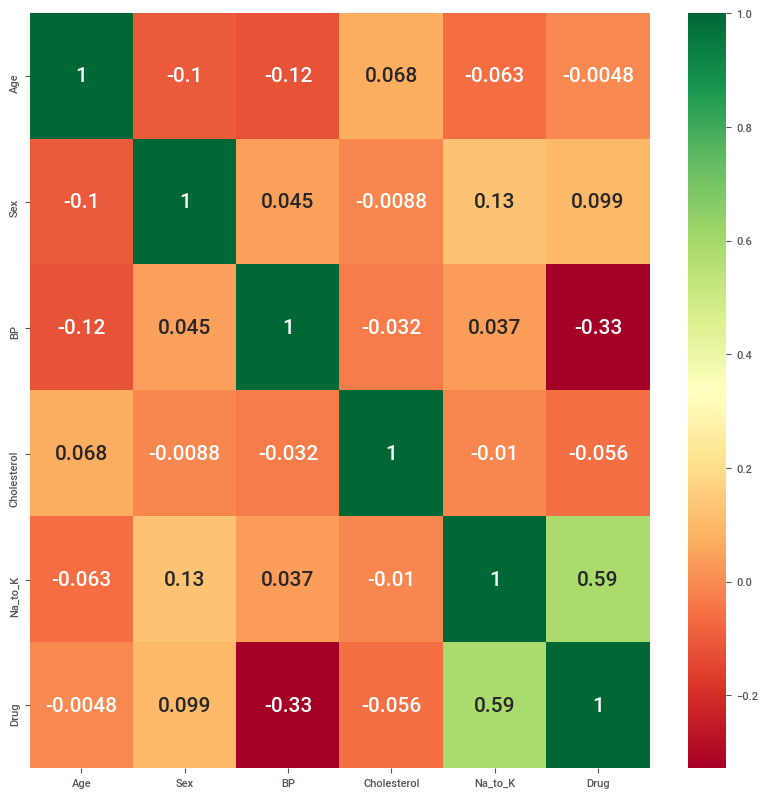

In [56]:
# Creating correlation Matrix

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## Classification Model

From the matrix, we can see that the there is almost no correlation between items , with a lot of items being negatively correlated 
The correlation matrix shows that the sodium-potassium ratio and blood pressure have the strongest positive correlation on the prescribed drug.
BP has a very strong negative correlation to the prescribed drug.

In [46]:
#Create x and y variables
x = df.drop('Drug', axis=1).to_numpy()
y = df['Drug'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=100)

#Models
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(x_train,y_train)

predTree = drugTree.predict(x_test)


## Decision Tree

In [47]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

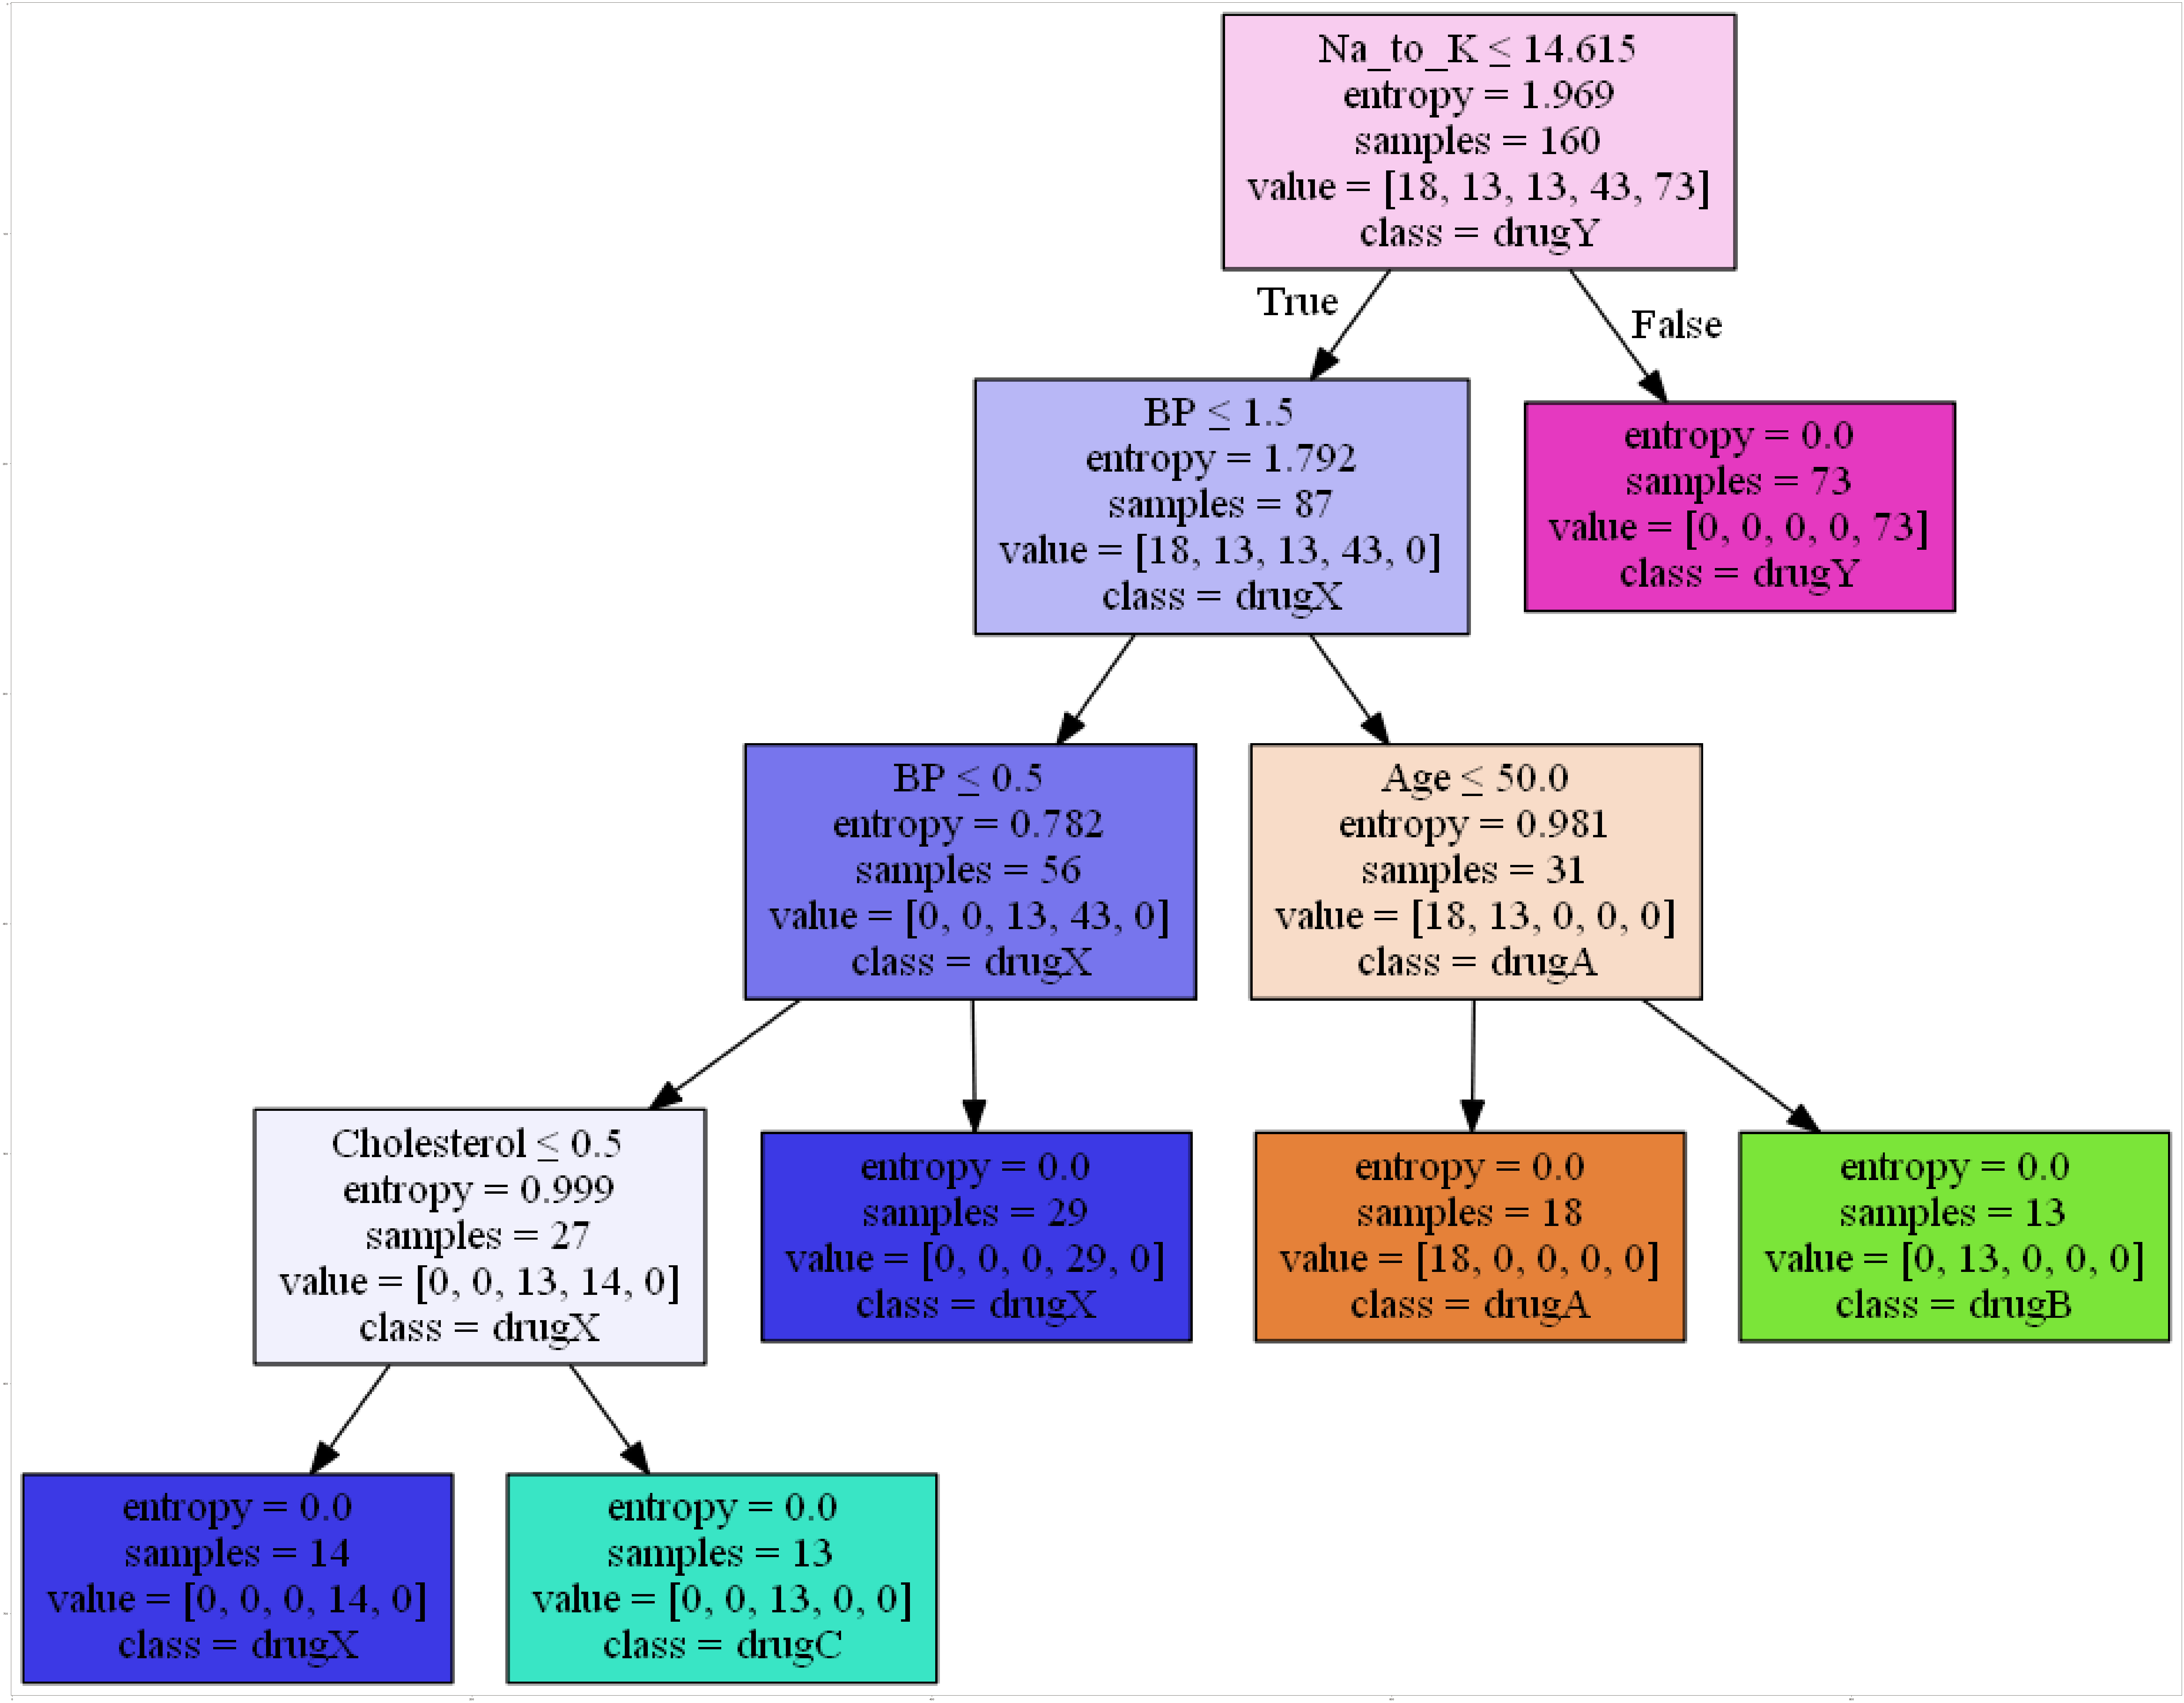

In [48]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<h1>Summary</h1>

<b> Na_to_k < =14.615:</b>
    The first question the decision tree ask is if the Na to Potassium Ration is less than 2.14.615. 
Based on the result, it either follows the true or the false path.

<b> entropy = 1.929:</b> Entropy shows us the measure of disorder.

<b>samples = 140:</b> Since the drugY data set contains 160 samples, this value is set to 160.

<b>value = [16, 11, 11,33,69]:</b> The value list tells you how many samples at the given node fall into each category. The first element of the list shows the number of samples that belong to the drugY class, the second element of the list shows the number of samples that belong to the drugX class, and the third element in the list shows the number of samples that belong to the drugA class. 


<b>class = DrugY:</b> The class value shows the prediction a given node will make and it can be determined from the value list. Whichever class occurs the most within the node will be selected as the class value.

## Showing The Accuracy of the Model

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


print("Decision Trees's Accuracy: ", drugTree.score(x_test,y_test))

Decision Trees's Accuracy:  0.975


Our Decision tree algorithm has an, accuracy of 97.5%

#Conclusion  Evaluating the Algorithm 
Our initial estimate was quite accurate with an accuracy of 97.5%. We are able to predict which drug to use with a 97.5%  accuracy.


Making Preeictions

In [57]:
predTree = drugTree.predict(x_test)

In the program below we compare the preidction to the actual dataset. As you can see our Decsion tree is quite effective only missing one value

In [59]:
print (predTree [0:10])
print (y_test [0:10])

['drugA' 'drugY' 'drugB' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX' 'drugX'
 'drugY']
['drugA' 'drugX' 'drugB' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX' 'drugX'
 'drugY']


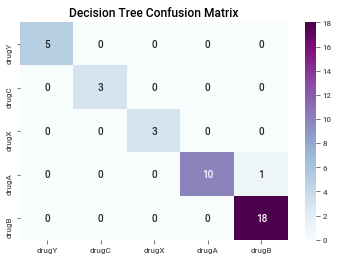

In [50]:
# Confusion Matrix
%matplotlib inline
cmat = confusion_matrix(y_test, predTree)
fig, ax = plt.subplots()
sns.heatmap(cmat, annot=True, cmap="BuPu")
ax.set_xticklabels(alabs)
ax.set_yticklabels(alabs)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In conlcusion out decsion tree is good at predicting which drug should be used